# The initial exploratory of the data


first we load the data and take a look at the data

In [47]:
library(car)
data = read.csv("../project materials/cancer.csv", header = T)
print(sapply(data,typeof))
message("There are ",nrow(data), " rows of data")
summary(data)

                   X          avgAnnCount            medIncome 
           "integer"             "double"            "integer" 
          popEst2015       povertyPercent            binnedInc 
           "integer"             "double"            "integer" 
           MedianAge        MedianAgeMale      MedianAgeFemale 
            "double"             "double"             "double" 
           Geography     AvgHouseholdSize       PercentMarried 
           "integer"             "double"             "double" 
        PctNoHS18_24           PctHS18_24      PctSomeCol18_24 
            "double"             "double"             "double" 
     PctBachDeg18_24         PctHS25_Over    PctBachDeg25_Over 
            "double"             "double"             "double" 
  PctEmployed16_Over PctUnemployed16_Over   PctPrivateCoverage 
            "double"             "double"             "double" 
  PctEmpPrivCoverage    PctPublicCoverage             PctWhite 
            "double"             "double

There are 3047 rows of data


       X           avgAnnCount        medIncome        popEst2015      
 Min.   :   1.0   Min.   :    6.0   Min.   : 22640   Min.   :     827  
 1st Qu.: 762.5   1st Qu.:   76.0   1st Qu.: 38883   1st Qu.:   11684  
 Median :1524.0   Median :  171.0   Median : 45207   Median :   26643  
 Mean   :1524.0   Mean   :  606.3   Mean   : 47063   Mean   :  102637  
 3rd Qu.:2285.5   3rd Qu.:  518.0   3rd Qu.: 52492   3rd Qu.:   68671  
 Max.   :3047.0   Max.   :38150.0   Max.   :125635   Max.   :10170292  
                                                                       
 povertyPercent               binnedInc      MedianAge      MedianAgeMale  
 Min.   : 3.20   (45201, 48021.6]  : 306   Min.   : 22.30   Min.   :22.40  
 1st Qu.:12.15   (54545.6, 61494.5]: 306   1st Qu.: 37.70   1st Qu.:36.35  
 Median :15.90   [22640, 34218.1]  : 306   Median : 41.00   Median :39.60  
 Mean   :16.88   (42724.4, 45201]  : 305   Mean   : 45.27   Mean   :39.57  
 3rd Qu.:20.40   (48021.6, 51046.4]: 305   3

### Data Exploration and cleaning:
Based on the results of the data summary, we can tell that the data set has 30 different parameters. Among the 30, 29 of them have the data type of either "double" or "integer", and one series is of type "string". 
<br>There are several things that seem wrong at the very first glance:
<br>1) The parameter "MedianAge" has maximum value of 624. To the best of our knowledge, the US county with the oldest age median has median age around 65, therefore, we are setting the clean-up criterion at 65 for this parameter
<br>2) The parameter "AvgHouseholdSize" has values smaller than 1. Our assumption is that every household should have at least 1 person, therefore, we are using value 1 as our clean-up criterion
<br>3) The paramter "PctHS18_24" has the min value at 0. In the US, it is usually expected that people finish high school with very few exceptions, there are cases that parents can sign a paper so that their kids can drop out from high school. However, 0% of population between 18 and 24 years old have high school diploma does not make a lot of sense. We did a box plot below on this parameter just to make sure that there are not too many counties like that, and it turns out there is only one data point that has the value 0, and with our assumption, we will remove this row of data. We assume that for the other rows with lower percentage of high school diploma between 18-24 years old, have their special reasons (high age average so that no people between 18-24, or due to people with certain ethnic background)

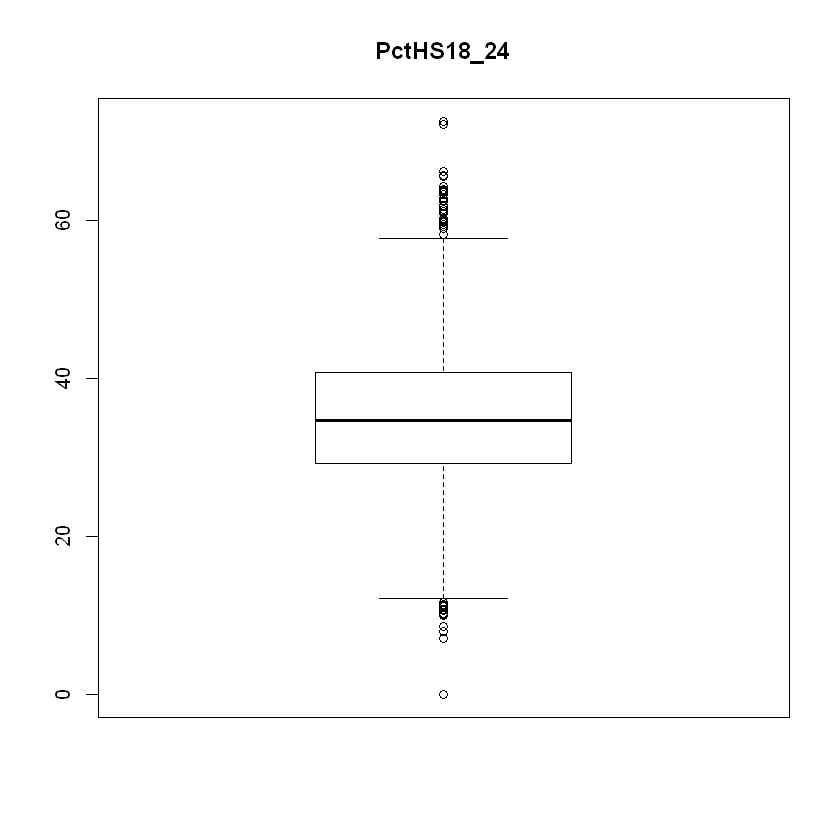

In [3]:
boxplot(data$PctHS18_24, main="PctHS18_24")

4) The parameter "BirthRate" has the minimum value of straight 0, which is suspicious to our experience. We did a box plot just like the one for the parameter "PctHS18_24" to make sure whether this is a singulated extreme value or there are other data points in similar positions. <br>
>As shown in the printed out messages and boxplot below, there is no single cut-off value for 'BirthRate", and therefore we are assuming that the parameter is fine and the data point with straight 0 value might come from a round-off or are some extreme cases in the country

There are 57 points smaller than 2.0
There are 13 points smaller than 1.0
The country with zero birth rate are: 


[1] De Baca County, New Mexico Coke County, Texas        
[3] Jeff Davis County, Texas   Kinney County, Texas      
3047 Levels: Abbeville County, South Carolina ... Zavala County, Texas

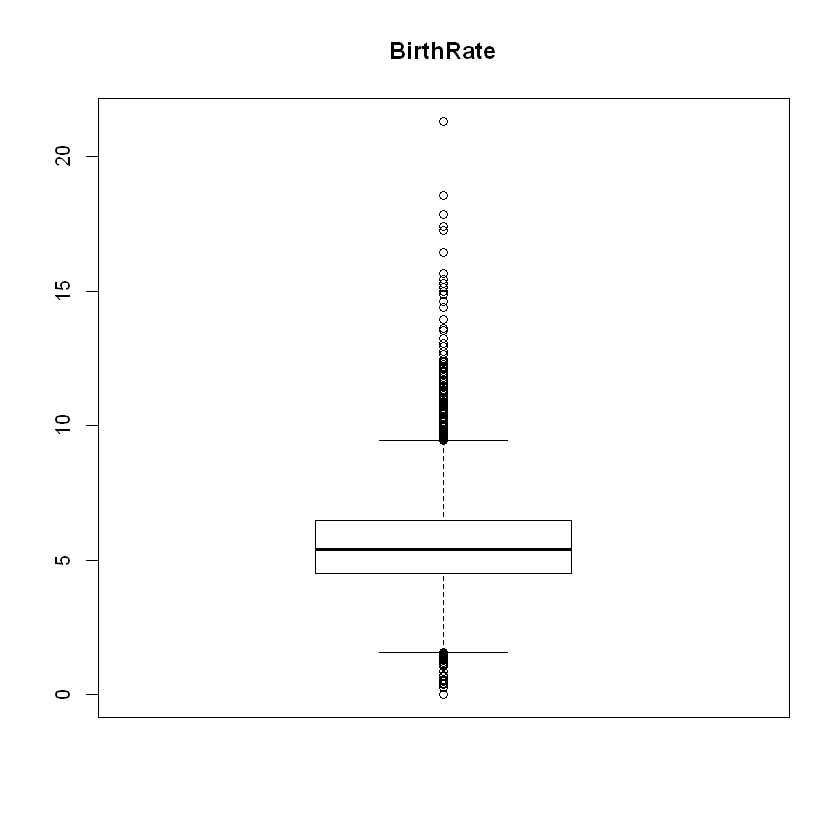

In [33]:
message("There are ",nrow(subset(data,data$BirthRate < 2.0))," points smaller than 2.0")
message("There are ",nrow(subset(data,data$BirthRate < 1.0))," points smaller than 1.0")
message("The country with zero birth rate are: ")
subset(data,data$BirthRate == 0)$Geography
boxplot(data$BirthRate, main="BirthRate")

5) To further check the validity of the dataset, we added up the values from four columns with information on percentage of race distribution across the counties. Our expectation was that the total value should be very close to 100%, if not exactly at 100%. With the printed-out messages and boxplot, we have the following findings and conclusions for the data related to race:<br>
- With the fourth data series being "PctOtherRace", the assumption is that every county should have 100% for "race_total". Considering some small errors in counting and collecting data, 95% should really be the tolerence level for the level of accuracy of these four data columns. 
- However, there are 421 rows of data violating the 95% limit out of the 3047 rows of total data, which accounts of 14% of the total data
- On top of it, there are 24 rows with "race_total" being smaller than 50% and 6 rows smaller than 20%.
- We have serious doubts about the quality of the race statistics, therefore, we are going to try to avoid using the data as we go on with the analysis


The details of data for total race percentage is: 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.23   96.41   97.70   95.99   98.42  100.00 

There are 421 rows of data with total race percentage smaller than 95%
There are 24 rows of data with total race percentage smaller than 50%
There are 6 rows of data with total race percentage smaller than 20%


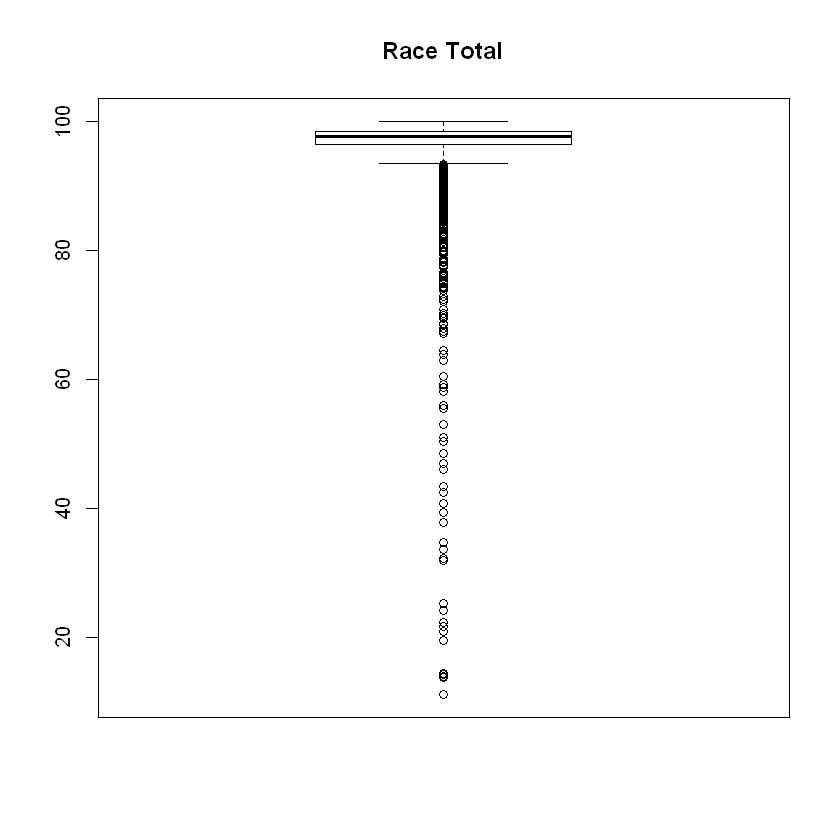

In [46]:
data$total_race <- data$PctAsian + data$PctBlack + data$PctWhite + data$PctOtherRace
message("The details of data for total race percentage is: ")
summary(data$total_race)
message("There are ",nrow(subset(data,data$total_race < 95)), " rows of data with total race percentage smaller than 95%")
message("There are ",nrow(subset(data,data$total_race < 50)), " rows of data with total race percentage smaller than 50%")
message("There are ",nrow(subset(data,data$total_race < 20)), " rows of data with total race percentage smaller than 20%")

boxplot(data$total_race, main = "Race Total")

### Detailed code for cleaning and renaming the data 

In [50]:
#Clean-up for median age
data$MedianAge[data$MedianAge >= 65] <- NA
#Clean-up for average household size
data$AvgHouseholdSize[data$AvgHouseholdSize < 1] <- NA
data$PctHS18_24[data$PctHS18_24 == 0] <- NA

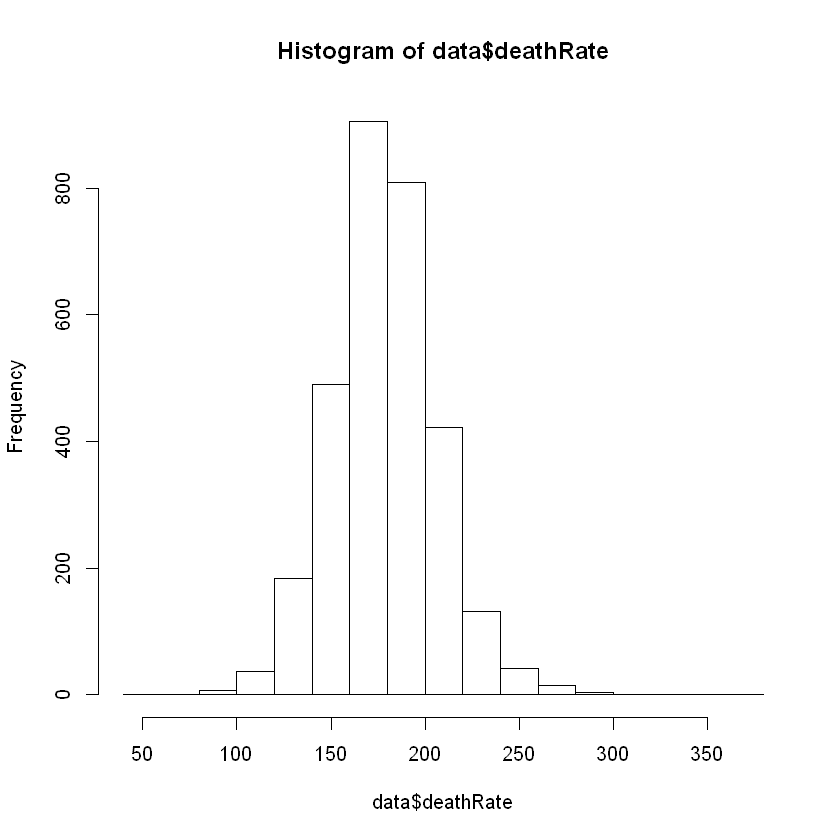

In [5]:
hist(data$deathRate)

In [6]:
data_num <- data[,sapply(data,is.numeric)]
cor(data_num[1:5])


,X,avgAnnCount,medIncome,popEst2015,povertyPercent
X,1.00000000,-0.02163091,-0.04969572,-0.05595008,0.03341044
avgAnnCount,-0.02163091,1.00000000,0.26914468,0.92689354,-0.13569391
medIncome,-0.04969572,0.26914468,1.00000000,0.23552286,-0.78896524
popEst2015,-0.05595008,0.92689354,0.23552286,1.00000000,-0.06529915
povertyPercent,0.03341044,-0.13569391,-0.78896524,-0.06529915,1.00000000


In [7]:
data_num$RaceAll <- data_num$PctAsian + data_num$PctBlack + data_num$PctWhite + data_num$PctOtherRace
summary(data_num$RaceAll)
summary(data_num)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.23   96.41   97.70   95.99   98.42  100.00 

       X           avgAnnCount        medIncome        popEst2015      
 Min.   :   1.0   Min.   :    6.0   Min.   : 22640   Min.   :     827  
 1st Qu.: 762.5   1st Qu.:   76.0   1st Qu.: 38883   1st Qu.:   11684  
 Median :1524.0   Median :  171.0   Median : 45207   Median :   26643  
 Mean   :1524.0   Mean   :  606.3   Mean   : 47063   Mean   :  102637  
 3rd Qu.:2285.5   3rd Qu.:  518.0   3rd Qu.: 52492   3rd Qu.:   68671  
 Max.   :3047.0   Max.   :38150.0   Max.   :125635   Max.   :10170292  
                                                                       
 povertyPercent    MedianAge     MedianAgeMale   MedianAgeFemale
 Min.   : 3.20   Min.   :22.30   Min.   :22.40   Min.   :22.30  
 1st Qu.:12.15   1st Qu.:37.70   1st Qu.:36.35   1st Qu.:39.10  
 Median :15.90   Median :40.90   Median :39.60   Median :42.40  
 Mean   :16.88   Mean   :40.82   Mean   :39.57   Mean   :42.15  
 3rd Qu.:20.40   3rd Qu.:43.80   3rd Qu.:42.50   3rd Qu.:45.30  
 Max.   :47.40   Max.   :65.30   M

In [8]:
# should we consider this data issue?
# data_num <- subset(data_num,data_num$RaceAll > 5)
# summary(data_num$RaceAll)
# nrow(data_num)

## this section analyze the common features for counties with higher death rate

In [9]:
deathRatequrt3 <- quantile(data_num$deathRate,0.75, na.rm=T)
message(deathRatequrt3)
data_sub1 <- subset(data_num,data_num$deathRate > deathRatequrt3)
nrow(data_sub1)
summary(data_sub1)

195.2


[1] 761

       X         avgAnnCount        medIncome       popEst2015     
 Min.   :  24   Min.   :    6.0   Min.   :22640   Min.   :    827  
 1st Qu.: 765   1st Qu.:   71.0   1st Qu.:34419   1st Qu.:  11043  
 Median :1529   Median :  122.0   Median :38465   Median :  20566  
 Mean   :1549   Mean   :  257.3   Mean   :39570   Mean   :  38301  
 3rd Qu.:2284   3rd Qu.:  221.0   3rd Qu.:43298   3rd Qu.:  37030  
 Max.   :3047   Max.   :10411.0   Max.   :79358   Max.   :1759335  
                                                                   
 povertyPercent    MedianAge     MedianAgeMale  MedianAgeFemale
 Min.   : 6.20   Min.   :23.30   Min.   :22.8   Min.   :24.50  
 1st Qu.:17.00   1st Qu.:38.60   1st Qu.:36.9   1st Qu.:40.20  
 Median :20.30   Median :40.90   Median :39.5   Median :42.40  
 Mean   :21.09   Mean   :40.84   Mean   :39.5   Mean   :42.24  
 3rd Qu.:24.50   3rd Qu.:43.00   3rd Qu.:41.7   3rd Qu.:44.50  
 Max.   :47.40   Max.   :54.60   Max.   :54.3   Max.   :59.60  
        

In [10]:
# install.packages("dplyr")
library(dplyr)
compare_them <- function(data1,data2) {
  sum1 <- apply(data1,2,summary) %>% data.frame() 
  sum2 <- apply(data2,2,summary) %>% data.frame() 

  names(sum1) <- paste0(names(sum1),"1")
  names(sum2) <- paste0(names(sum2),"2")

  final <- cbind(sum1,sum2)

  final1 <- t(final) 

  final2 <- final1[order(row.names(final1)), ]

  final_1 <- t(final2) %>% data.frame()
  final_1
}

compare_them(data_num,data_sub1) %>% View()
install.packages("compare")


ERROR: Error in library(dplyr): there is no package called 'dplyr'


In [52]:
install.packages("corrplot")

Installing package into 'C:/Users/zexu/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\zexu\AppData\Local\Temp\RtmpKwPWwD\downloaded_packages


corrplot 0.84 loaded


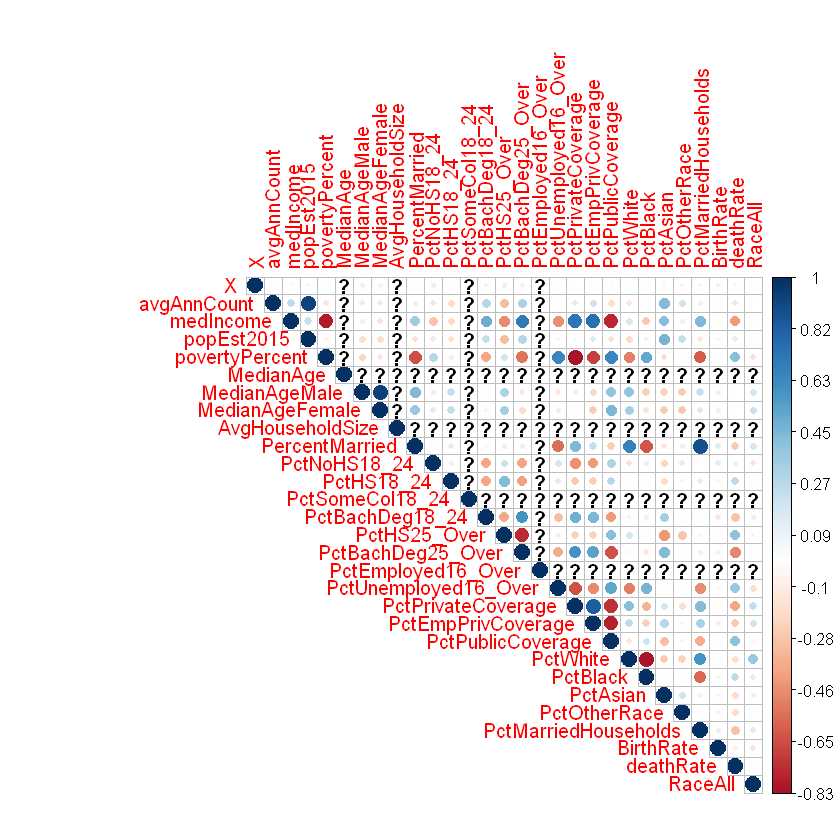

In [53]:
library(corrplot)
# cor(data_num)
# test <- as.matrix(sapply(cor(data_num),as.numeric))
corrplot(cor(data_num),is.corr=F, method = "circle", type='upper')